In [1]:
library(ArchR)
set.seed(1)
addArchRThreads(threads = 1)
addArchRGenome("mm10")
library(tidyverse)
library(here)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [7]:
Merged.proj2 <- readRDS(file="./Save-ArchR-Project.rds")

In [218]:
#integration
corGSM_MM <- correlateTrajectories(trajGSM, trajMM,corCutOff = 0.2,varCutOff1=0.5,varCutOff2=0.5)
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(
    trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder)
ht1 + ht2

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-3dbc1f164e58-Date-2020-12-17_Time-12-35-45.log
If there is an issue, please report to github with logFile!

Found 95 Correlated Pairings!

2020-12-17 12:35:58 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc970e193-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc970e193-Date-2020-12-17_Time-12-35-58.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc36ff50dc-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc36ff50dc-Date-2020-12-17_Time-12-35-58.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc3036d0eb-Date-2020-12-17_Time-12-35-58.log
If there is an issue, please report to github with logFile!

use

In [142]:
seGroupMotif <- getGroupSE(ArchRProj = Merged.proj2, useMatrix = "MotifMatrix", groupBy = "Seurat.Clusters")
seGroupMotif

ArchR logging to : ArchRLogs/ArchR-getGroupSE-3dbc24f2ecc4-Date-2020-12-16_Time-12-16-38.log
If there is an issue, please report to github with logFile!

Getting Group Matrix

2020-12-16 12:16:39 : Constructing Group Matrix 1 of 2, 0 mins elapsed.

2020-12-16 12:16:40 : Finished Group Matrix 1 of 2, 0.03 mins elapsed.

2020-12-16 12:16:40 : Constructing Group Matrix 2 of 2, 0.03 mins elapsed.

2020-12-16 12:16:42 : Finished Group Matrix 2 of 2, 0.052 mins elapsed.

2020-12-16 12:16:42 : Successfully Created Group Matrix, 0.052 mins elapsed.

Normalizing by number of Cells

ArchR logging successful to : ArchRLogs/ArchR-getGroupSE-3dbc24f2ecc4-Date-2020-12-16_Time-12-16-38.log



class: SummarizedExperiment 
dim: 1768 6 
metadata(0):
assays(1): MotifMatrix
rownames(1768): f1 f2 ... f1767 f1768
rowData names(3): seqnames idx name
colnames(6): C1 C2 ... C5 C6
colData names(31): TSSEnrichment ReadsInTSS ... ReadsInPeaks nCells

In [143]:
seZ <- seGroupMotif[rowData(seGroupMotif)$seqnames=="z",]
rowData(seZ)$maxDelta <- lapply(seq_len(ncol(seZ)), function(x){
  rowMaxs(assay(seZ) - assay(seZ)[,x])
}) %>% Reduce("cbind", .) %>% rowMaxs

In [144]:
corGSM_MM <- correlateMatrices(
    ArchRProj = Merged.proj2,
    useMatrix1 = "GeneScoreMatrix",
    useMatrix2 = "MotifMatrix",
    reducedDims = "IterativeLSI"
)
corGSM_MM

ArchR logging to : ArchRLogs/ArchR-correlateMatrices-3dbc6f3de032-Date-2020-12-16_Time-12-17-29.log
If there is an issue, please report to github with logFile!

When accessing features from a matrix of class Sparse.Assays.Matrix it requires 1 seqname!
Continuing with first seqname 'z'!
If confused, try getFeatures(ArchRProj, 'MotifMatrix') to list out available seqnames for input!

2020-12-16 12:17:29 : Testing 791 Mappings!, 0.014 mins elapsed.

2020-12-16 12:17:29 : Computing KNN, 0.014 mins elapsed.

2020-12-16 12:17:30 : Identifying Non-Overlapping KNN pairs, 0.015 mins elapsed.

2020-12-16 12:17:31 : Identified 495 Groupings!, 0.045 mins elapsed.

2020-12-16 12:17:32 : Getting Group Matrix 1, 0.053 mins elapsed.

2020-12-16 12:17:56 : Getting Group Matrix 2, 0.45 mins elapsed.

Some entries in groupMat2 are less than 0, continuing without Log2 Normalization.
Most likely this assay is a deviations matrix.

Getting Correlations...

2020-12-16 12:18:00 : 

Computing Correlation (250 

DataFrame with 791 rows and 14 columns
    GeneScoreMatrix_name MotifMatrix_name                 cor
                 <array>          <array>           <numeric>
1                  Sox17        Sox17_733  0.0797098880504578
2                  Mybl1        Mybl1_647   0.208706383105833
3                    Msc           Msc_43   0.304515773822116
4                 Arid5a         Arid5a_9  -0.259377225316372
5                  Npas2         Npas2_44  0.0933529088823853
...                  ...              ...                 ...
787                  Hdx          Hdx_495  -0.177524974201648
788               Zfp711       Zfp711_168  -0.122966607721691
789                 Esx1         Esx1_444 -0.0958213533343815
790                 Klf8         Klf8_194  0.0440478097842635
791               Mbtps2       Mbtps2_813   0.160016553566164
                    padj                 pval GeneScoreMatrix_seqnames
               <numeric>            <numeric>                    <Rle>
1            

[1] "Klf16" "Sp1"

Warning message:
“Removed 6 rows containing missing values (geom_point).”


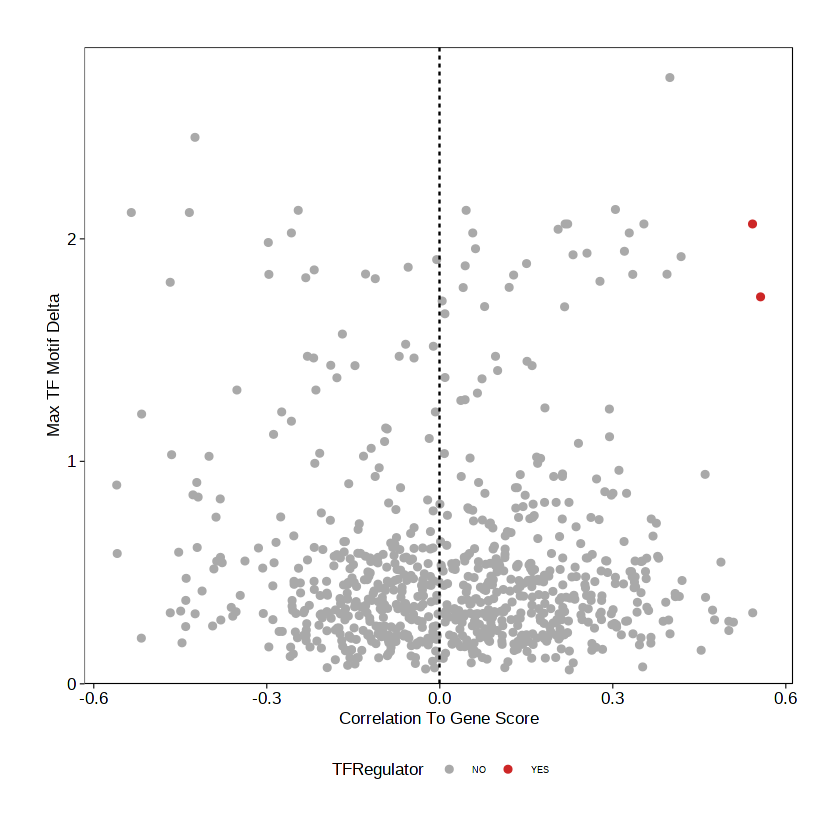

In [145]:
corGSM_MM$maxDelta <- rowData(seZ)[match(corGSM_MM$MotifMatrix_name, rowData(seZ)$name), "maxDelta"]
corGSM_MM <- corGSM_MM[order(abs(corGSM_MM$cor), decreasing = TRUE), ]
corGSM_MM <- corGSM_MM[which(!duplicated(gsub("\\-.*","",corGSM_MM[,"MotifMatrix_name"]))), ]
corGSM_MM$TFRegulator <- "NO"
corGSM_MM$TFRegulator[which(corGSM_MM$cor > 0.5 & corGSM_MM$padj < 0.01 & corGSM_MM$maxDelta > quantile(corGSM_MM$maxDelta, 0.75))] <- "YES"
sort(corGSM_MM[corGSM_MM$TFRegulator=="YES",1])

p <- ggplot(data.frame(corGSM_MM), aes(cor, maxDelta, color = TFRegulator)) +
  geom_point() + 
  theme_ArchR() +
  geom_vline(xintercept = 0, lty = "dashed") + 
  scale_color_manual(values = c("NO"="darkgrey", "YES"="firebrick3")) +
  xlab("Correlation To Gene Score") +
  ylab("Max TF Motif Delta") +
  scale_y_continuous(
    expand = c(0,0), 
    limits = c(0, max(corGSM_MM$maxDelta)*1.05)
  )

p

In [21]:
Major.trajectory <- c("C2", "C5", "C6")
Merged.proj2 <- addTrajectory(
    ArchRProj = Merged.proj2, 
    name = "Major_trajectory", 
    groupBy = "Seurat.Clusters",
    trajectory = Major.trajectory, 
    embedding = "UMAP", 
    force = TRUE
)

ArchR logging to : ArchRLogs/ArchR-addTrajectory-4d1122c9c767-Date-2021-02-21_Time-17-18-50.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-4d1122c9c767-Date-2021-02-21_Time-17-18-50.log



ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d1118cd49de-Date-2021-02-21_Time-17-18-56.log
If there is an issue, please report to github with logFile!

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-4d1118cd49de-Date-2021-02-21_Time-17-18-56.log

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”


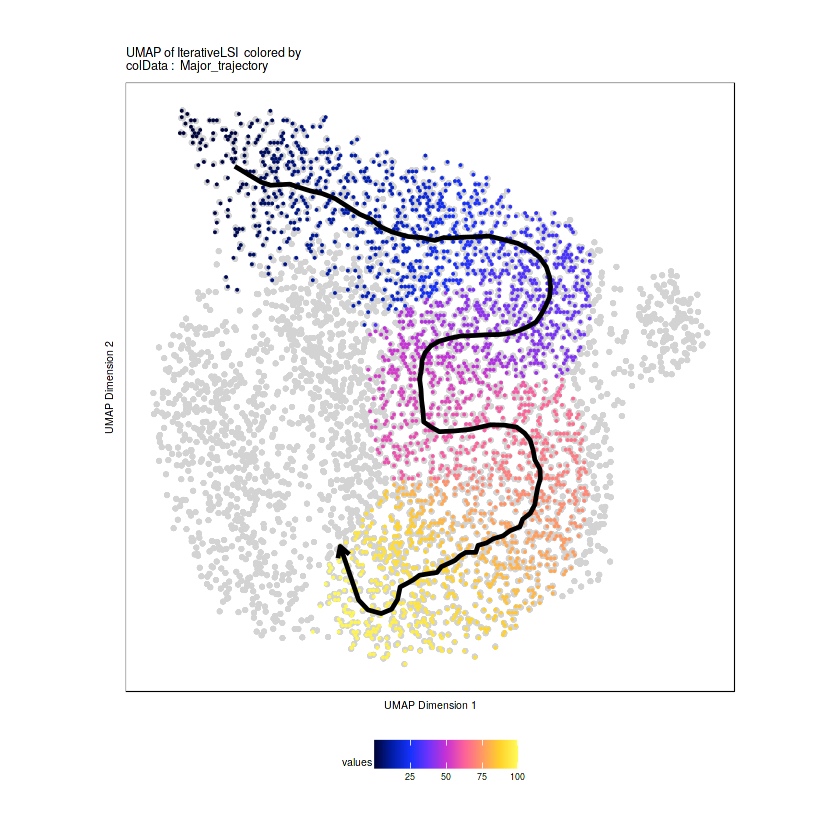

In [22]:
p <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "cellColData", name = "Major_trajectory")
p[[1]]

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:30 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-4d117e035737-Date-2021-02-23_Time-12-34-29.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-4d1159e0b2e6-Date-2021-02-23_Time-12-34-31.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2021-02-23 12:34:31 : 

1 
2 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1522 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot


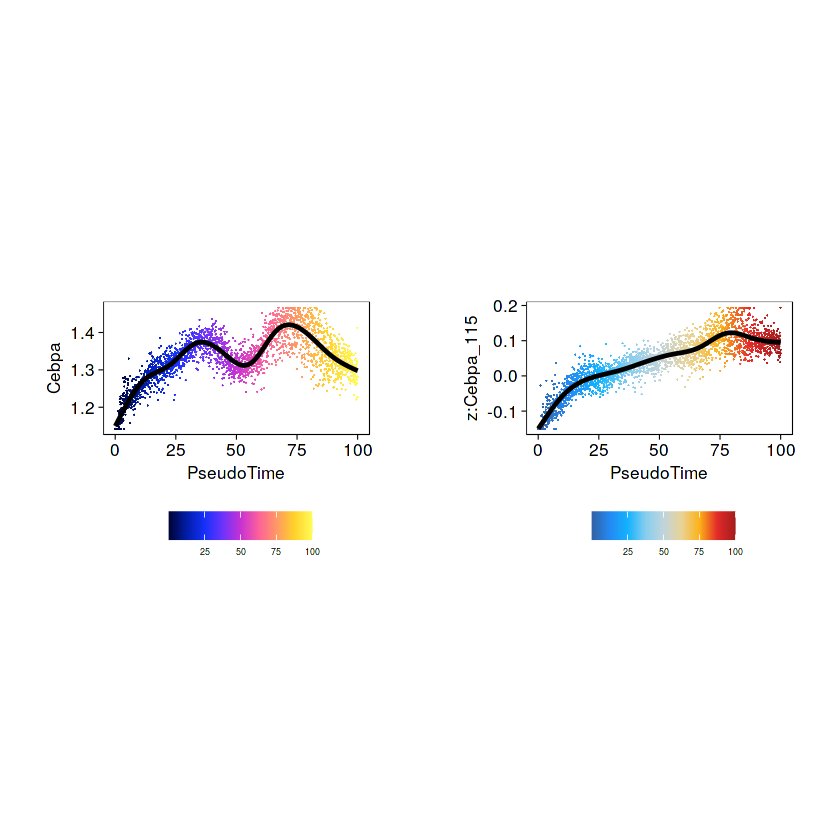

In [58]:
p1 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "GeneScoreMatrix", name = "Cebpa", continuousSet = "horizonExtra")
p2 <- plotTrajectory(Merged.proj2, trajectory = "Major_trajectory", colorBy = "MotifMatrix", name = "z:Cebpa_115", continuousSet = "solarExtra")
ggAlignPlots(p1[[2]], p2[[2]], type = "h")

In [212]:
trajMM  <- getTrajectory(ArchRProj = Merged.proj2, name = "Major_trajectory", useMatrix = "MotifMatrix", log2Norm = FALSE)
p1 <- plotTrajectoryHeatmap(trajMM, pal = paletteContinuous(set = "solarExtra"),labelTop = 100)
p1

Creating Trajectory Group Matrix..

Some values are below 0, this could be a DeviationsMatrix in which scaleTo should be set = NULL.
Continuing without depth normalization!

Smoothing...

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc50a97aa2-Date-2020-12-17_Time-12-31-36.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2020-12-17 12:31:36 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2020-12-17 12:31:36 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-3dbc50a97aa2-Date-2020-12-17_Time-12-31-36.log



Creating Trajectory Group Matrix..

Smoothing...

Warning message:
“'trajectoryHeatmap' is deprecated.
Use 'plotTrajectoryHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d1147bf2de2-Date-2021-02-23_Time-15-35-24.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d1147bf2de2-Date-2021-02-23_Time-15-35-24.log



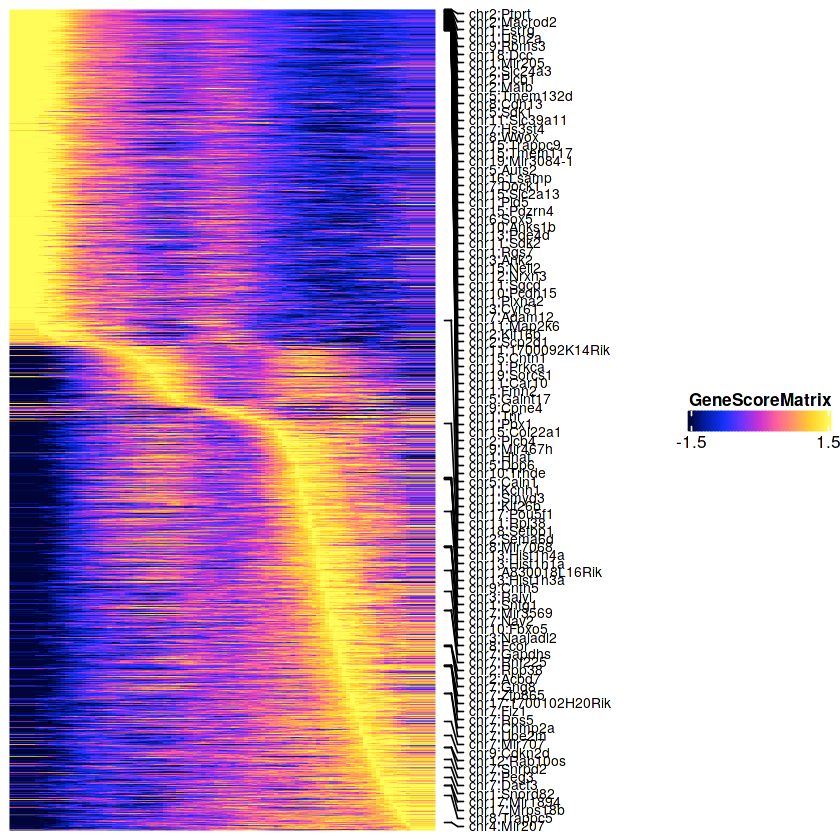

In [65]:
trajGSM <- getTrajectory(ArchRProj = Merged.proj2, name = "Major_trajectory", useMatrix = "GeneScoreMatrix", log2Norm = TRUE)
p2 <- trajectoryHeatmap(trajGSM,  pal = paletteContinuous(set = "horizonExtra"),labelTop = 100)
p2

In [99]:
trajGSM2 <- trajGSM[corGSM_MM[[1]]$name1, ]
trajMM2 <- trajMM[corGSM_MM[[1]]$name2, ]

In [100]:
trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(trajGSM2), 1, scale)) + t(apply(assay(trajMM2), 1, scale))

In [101]:
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d111ad21253-Date-2021-02-23_Time-15-43-11.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d111ad21253-Date-2021-02-23_Time-15-43-11.log



In [102]:
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d11734ffd14-Date-2021-02-23_Time-15-47-12.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d11734ffd14-Date-2021-02-23_Time-15-47-12.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d111df7fce1-Date-2021-02-23_Time-15-47-13.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2021-02-23 15:47:13 : 

force=FALSE thus continuing with subsetting useSeqnames = z

2021-02-23 15:47:13 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-4d111df7fce1-Date-2021-02-23_Time-15-47-13.log



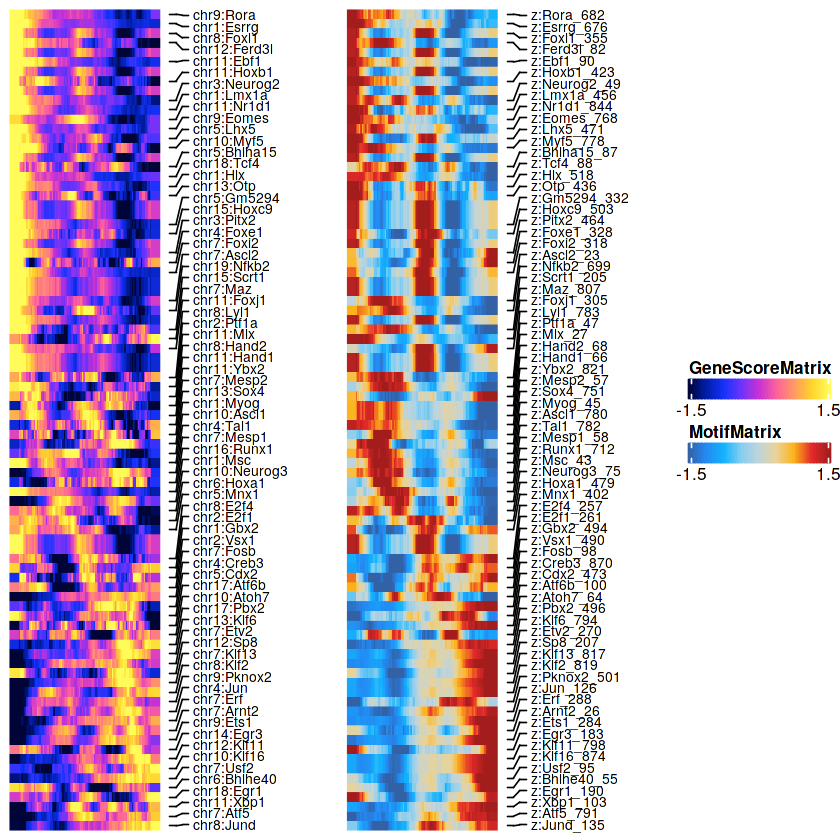

In [104]:
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  labelTop = 100, varCutOff = 0.1, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajMM2, pal = paletteContinuous(set = "solarExtra"), labelTop = 100, varCutOff = 0.1, rowOrder = rowOrder)
ht1 + ht2

In [219]:
# plot heatmap
pdf("RA.traj.combine.pdf", width=5, height=10)
#options(repr.plot.height=20,repr.plot.width=8)
ComplexHeatmap::draw(ht1 + ht2, heatmap_legend_side = "bot", annotation_legend_side = "bot")
dev.off()

png 
  2